In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Experimento 1

Datos:

100000 -> training

&nbsp; 20000 -> validation
 
&nbsp; 20000 -> test

Se fija los 100k como datos no anotados y:

a) Se utiliza 25% de datos de training anotados.

b) Se utiliza 50% de datos de training anotados.

c) Se utiliza 75% de datos de training anotados.

d) Se utiliza 100% de datos de training anotados.

In [2]:
results = pd.read_csv('../models/experiments/cnn_wide_ladder_exp_1.csv')

In [3]:
results.head()

,experiment,split,epoch,accuracy,tloss,lloss,true,pred
0,exp_1_a_cnn_ladder,training,1,0.608,34.9,1.29,4,4
1,exp_1_a_cnn_ladder,training,1,0.608,34.9,1.29,2,3
2,exp_1_a_cnn_ladder,training,1,0.608,34.9,1.29,2,3
3,exp_1_a_cnn_ladder,training,1,0.608,34.9,1.29,3,0
4,exp_1_a_cnn_ladder,training,1,0.608,34.9,1.29,3,2


In [4]:
exp_names = results.experiment.unique()
exp_names

array(['exp_1_a_cnn_ladder', 'exp_1_b_cnn_ladder', 'exp_1_c_cnn_ladder',
       'exp_1_d_cnn_ladder'], dtype=object)

In [5]:
exp_1_a_cnn_wide_ladder = results[results.experiment == exp_names[0]]
exp_1_b_cnn_wide_ladder = results[results.experiment == exp_names[1]]
exp_1_c_cnn_wide_ladder = results[results.experiment == exp_names[2]]
exp_1_d_cnn_wide_ladder = results[results.experiment == exp_names[3]]

### Experimento 1 a)

In [8]:
split_group = exp_1_a_cnn_wide_ladder.groupby('split')
split_group.accuracy.describe()

,count,mean,std,min,25%,50%,75%,max
split,,,,,,,,
test,20000.0,0.663160,0.043442,0.531,0.641,0.665,0.702,0.722
training,1252048.0,0.642099,0.017880,0.573,0.631,0.643,0.654,0.691
validation,1000000.0,0.664376,0.027959,0.570,0.646,0.660,0.685,0.730


### Experimento 1 b)

In [9]:
split_group = exp_1_b_cnn_wide_ladder.groupby('split')
split_group.accuracy.describe()

,count,mean,std,min,25%,50%,75%,max
split,,,,,,,,
test,20000.0,0.620533,0.048360,0.485,0.600,0.625,0.657,0.695
training,2305700.0,0.551972,0.069046,0.265,0.557,0.574,0.588,0.735
validation,1000000.0,0.575768,0.100490,0.173,0.574,0.600,0.634,0.688


### Experimento 1 c)

In [10]:
split_group = exp_1_c_cnn_wide_ladder.groupby('split')
split_group.accuracy.describe()

,count,mean,std,min,25%,50%,75%,max
split,,,,,,,,
test,20000.0,0.687016,0.037354,0.601,0.666,0.688,0.719,0.754
training,2903150.0,0.640309,0.032536,0.419,0.632,0.645,0.656,0.698
validation,1000000.0,0.673609,0.030142,0.495,0.659,0.675,0.694,0.735


### Experimento 1 d)

In [11]:
split_group = exp_1_d_cnn_wide_ladder.groupby('split')
split_group.accuracy.describe()

,count,mean,std,min,25%,50%,75%,max
split,,,,,,,,
test,20000.0,0.629280,0.043688,0.558,0.604,0.630,0.657,0.730
training,3274600.0,0.585367,0.031049,0.396,0.577,0.590,0.602,0.643
validation,1000000.0,0.616140,0.040327,0.458,0.586,0.622,0.649,0.690


In [24]:
def plot_exp_1(results, split): # split: 'train' or 'validation'
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))
    sns.set_style('darkgrid')
    ax_acc = sns.lineplot(x='epoch', y='accuracy', hue='experiment', 
                          data=results[results.split == split], ax=ax[0])
    ax_acc.set_title(split + ' accuracy')
    ax_acc.plot()
    ax_l = sns.lineplot(x='epoch', y='lloss', hue='experiment', 
                        data=results[results.split == split], ax=ax[1])
    ax_l.set_title(split + ' labeled loss')
    ax_l.plot()

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


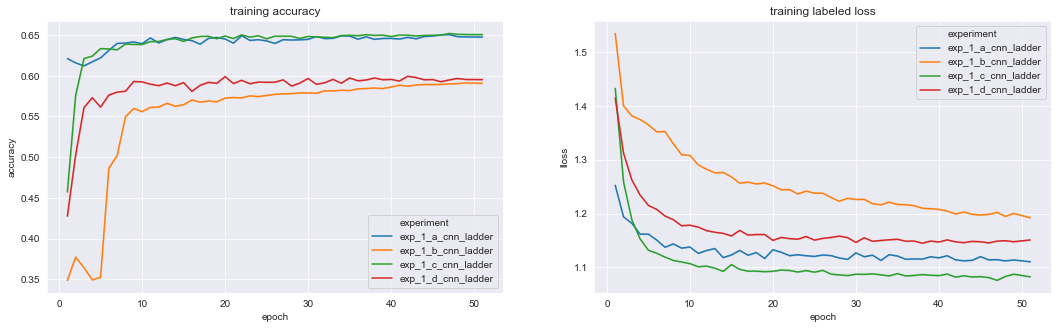

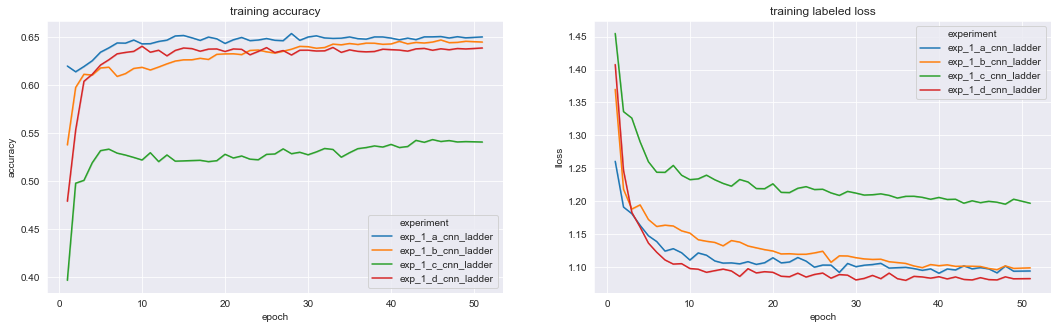

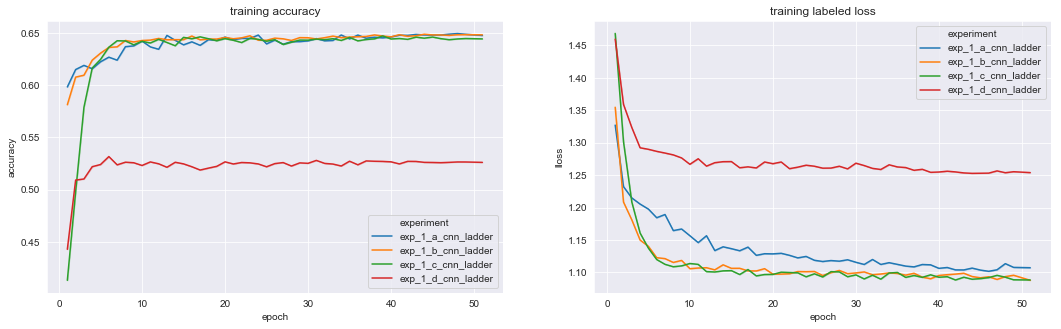

In [25]:
results = pd.read_csv('../models/experiments/cnn_wide_ladder_exp_1.csv')
plot_exp_1(results, 'training')
results = pd.read_csv('../models/experiments/cnn_wide_ladder_exp_1_2.csv')
plot_exp_1(results, 'training')
results = pd.read_csv('../models/experiments/cnn_wide_ladder_exp_1_3.csv')
plot_exp_1(results, 'training')

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


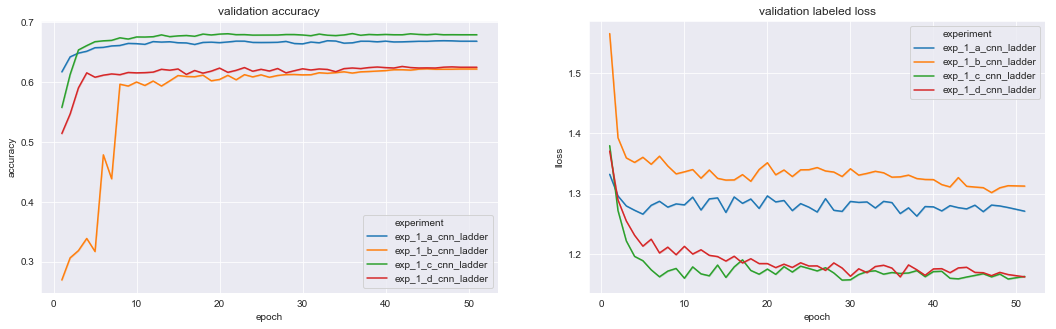

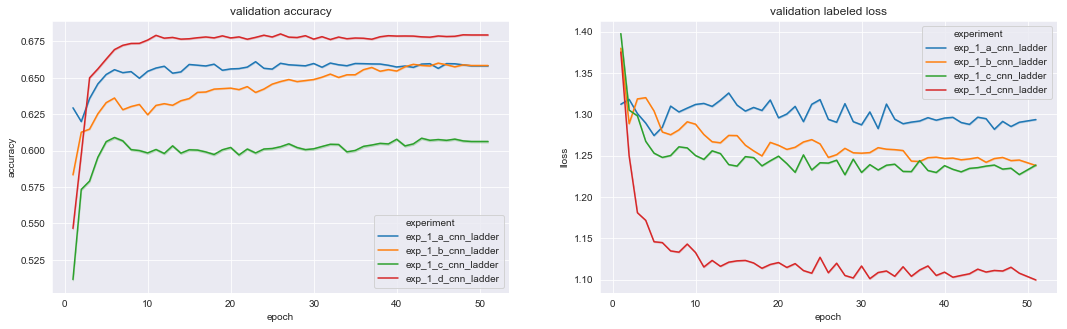

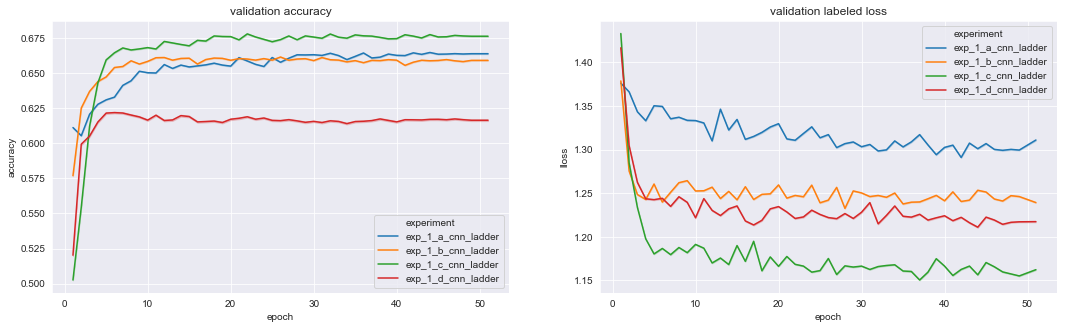

In [26]:
results = pd.read_csv('../models/experiments/cnn_wide_ladder_exp_1.csv')
plot_exp_1(results, 'validation')
results = pd.read_csv('../models/experiments/cnn_wide_ladder_exp_1_2.csv')
plot_exp_1(results, 'validation')
results = pd.read_csv('../models/experiments/cnn_wide_ladder_exp_1_3.csv')
plot_exp_1(results, 'validation')

In [17]:
test_metrics_sample = exp_1_c_cnn_wide_ladder[exp_1_c_cnn_wide_ladder.split == 'test']
test_acc = test_metrics_sample.accuracy.unique()
np.mean(test_acc)

0.6849999999999999

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[]

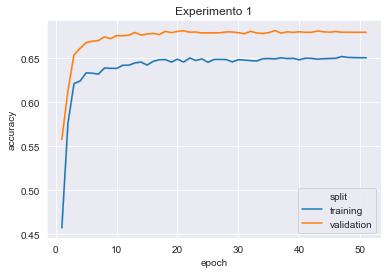

In [18]:
sns.set_style('darkgrid')
train_val_df = exp_1_c_cnn_wide_ladder[exp_1_c_cnn_wide_ladder.split.isin(['training', 'validation'])]
ax_acc = sns.lineplot(x='epoch', y='accuracy', hue='split', data=train_val_df)
ax_acc.set_title('Experimento 1')
ax_acc.plot()

### Conclusiones Experimento 1:

- Tomando un 75% de los datos de entrenamiento como anotados se obtienen los mejores resultados.
- Si bien no se obtiene una accuracy alta, se aprecia la gran capacidad de generalización que posee el modelo.

# Experimento 2

- Se utiliza el mejor caso del experimento 1: 75% (= 75k) de los datos de training anotados.
- Se toma a su vez una proporción disjunta de datos no anotados sumada a los 100k utilizados en el experimento 1. Cantidad elegida: 200k datos disjuntos no anotados.
- Verificar si mejora validation agregando mas datos no anotados (i.e. si el modelo generaliza aún más).

Datos:

300000 -> training (100k del experimento 1 + 200k nuevos) 

Se utilizan 75% de los primeros 100k como datos anotados 

(#datos anotados = 75k)

(#datos no anotados = 300k)

&nbsp; 20000 -> validation
 
&nbsp; 20000 -> test

In [19]:
train = pd.read_csv('../corpus_WiNER/cnn_instances/words_entity_W_2_cnn_train.csv')
train_extra = pd.read_csv('../corpus_WiNER/cnn_instances/words_entity_W_2_cnn_train_extra.csv')
print(train.shape)
print(train_extra.shape)
# train = train[:100000]
# train.to_csv('../corpus_WiNER/cnn_instances/words_entity_W_2_cnn_train_exp_1.csv', index=False)
train = train[:100000]
train_extra = train_extra[:200000]
train_exp_2 = pd.concat([train, train_extra])
train_exp_2.shape
# train_exp_2.to_csv('../corpus_WiNER/cnn_instances/words_entity_W_2_cnn_train_exp_2.csv', index=False)

(160595, 2)
(494589, 2)


(300000, 2)

In [27]:
results_exp_2 = pd.read_csv('../models/experiments/cnn_wide_ladder_exp_2.csv')
split_group = results_exp_2.groupby('split')
split_group.accuracy.describe()

,count,mean,std,min,25%,50%,75%,max
split,,,,,,,,
test,20000.0,0.231878,0.066165,0.0527,0.190,0.243,0.277,0.314
training,3750000.0,0.408394,0.031621,0.2190,0.394,0.412,0.429,0.483
validation,1000000.0,0.275038,0.034926,0.1310,0.254,0.272,0.297,0.356


In [29]:
def plot_exp_2(results_exp_2):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))
    sns.set_style('darkgrid')
    train_val_df = results_exp_2[results_exp_2.split.isin(['training', 'validation'])]
    ax_acc = sns.lineplot(x='epoch', y='accuracy', hue='split', data=train_val_df, ax=ax[0])
    ax_acc.set_title('Experimento 2')
    ax_acc.plot()
    train_val_df = results_exp_2[results_exp_2.split.isin(['training', 'validation'])]
    ax_l = sns.lineplot(x='epoch', y='lloss', hue='split', data=train_val_df, ax=ax[1])
    ax_l.set_title('Experimento 2')
    ax_l.plot()

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


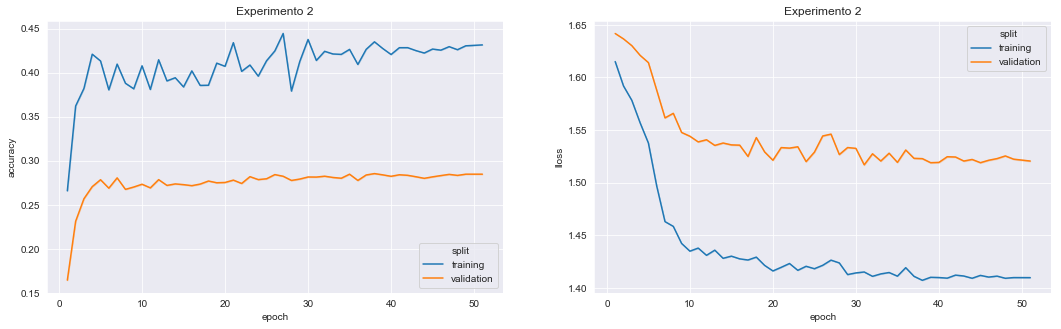

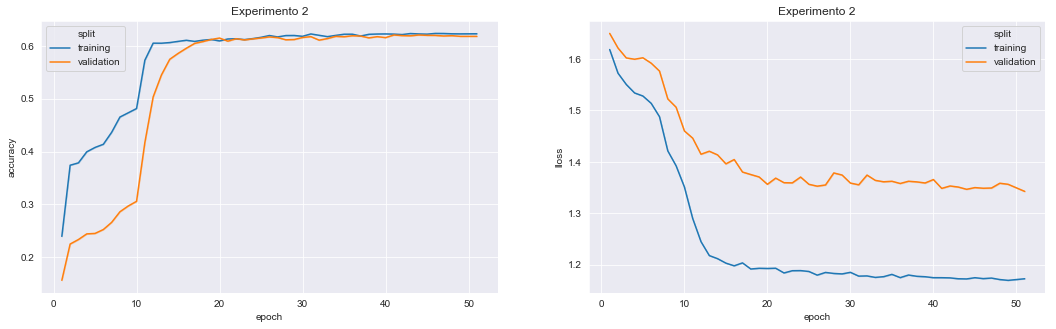

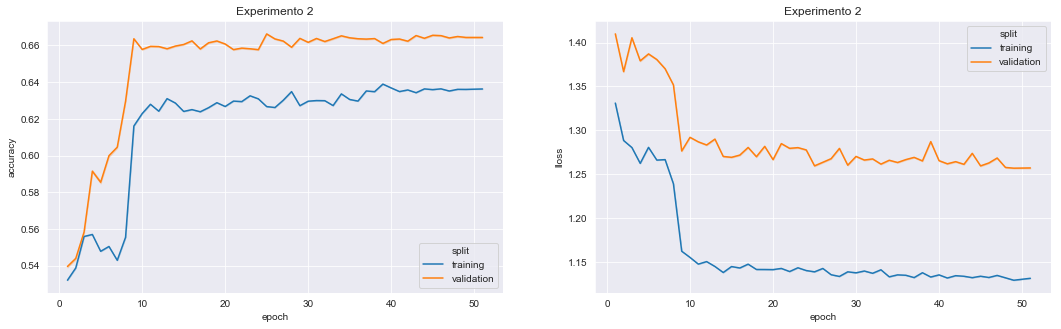

In [30]:
results_exp_2 = pd.read_csv('../models/experiments/cnn_wide_ladder_exp_2.csv')
plot_exp_2(results_exp_2)
results_exp_2 = pd.read_csv('../models/experiments/cnn_wide_ladder_exp_2_2.csv')
plot_exp_2(results_exp_2)
results_exp_2 = pd.read_csv('../models/experiments/cnn_wide_ladder_exp_2_3.csv')
plot_exp_2(results_exp_2)

# Experimento 3

- Se utiliza el mejor caso del experimento 1: 75k de datos de training anotados.
- Todos los datos no anotados deben ser disjuntos a los datos anotados, es decir, no se deben utilizar los datos anotados como no anotados.
- Cantidad elegida: 200k datos disjuntos no anotados.

Datos:

275000 -> training (75k anotados + 200k disjuntos no anotados) 

&nbsp; 20000 -> validation
 
&nbsp; 20000 -> test

In [19]:
train = pd.read_csv('../corpus_WiNER/cnn_instances/words_entity_W_2_cnn_train.csv')
train_extra = pd.read_csv('../corpus_WiNER/cnn_instances/words_entity_W_2_cnn_train_extra.csv')

In [20]:
train = train[:75000]
train_extra = train_extra[:200000]

In [21]:
train_exp_3 = pd.concat([train, train_extra])
train_exp_3.shape

(275000, 2)

In [22]:
train_exp_3.to_csv('../corpus_WiNER/cnn_instances/words_entity_W_2_cnn_train_exp_3.csv', index=False)

In [27]:
results_exp_3 = pd.read_csv('../models/experiments/results_cnn_ladder_exp_3.csv')
split_group = results_exp_3.groupby('split')
split_group.accuracy.describe()

,count,mean,std,min,25%,50%,75%,max
split,,,,,,,,
test,20000.0,0.690168,0.045095,0.619,0.656,0.689,0.711,0.812
training,3750000.0,0.704688,0.016698,0.637,0.693,0.705,0.716,0.766
validation,1000000.0,0.643005,0.032045,0.572,0.624,0.641,0.658,0.747


/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[]

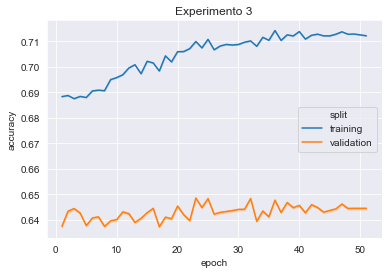

In [28]:
sns.set_style('darkgrid')
train_val_df = results_exp_3[results_exp_3.split.isin(['training', 'validation'])]
ax_acc = sns.lineplot(x='epoch', y='accuracy', hue='split', data=train_val_df)
ax_acc.set_title('Experimento 3')
ax_acc.plot()